<a href="https://colab.research.google.com/github/Sneha-Srivastava11/VOIS_AICTE_Oct2025_SnehaSrivastava_Netflix/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Netflix_Dataset.csv')

Looking at the Data

In [5]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.shape

(7789, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [8]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [9]:
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


# Cleaning The Data

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


None

In [11]:
df['Release_Date'] = df['Release_Date'].fillna(pd.to_datetime('1900-01-01'))
df['Rating'] = df['Rating'].fillna('Unknown')
display(df.isnull().sum())

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,0
Rating,0
Duration,0
Type,0


In [12]:
for col in ['Country', 'Cast', 'Director']:
    df[col].fillna('Unknown', inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-1605941980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [13]:
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Main_Genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Dramas


# Exploratory Data Analysis

In [14]:
# Count of Movies vs TV Shows
print("\nCategory Distribution:\n", df['Category'].value_counts())


Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [15]:
print("\n Top 5 countries:\n",df["Country"].value_counts().head())


 Top 5 countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [16]:
#which are the trending genre
print("Top genres\n",df['Main_Genre'].value_counts().head())

Top genres
 Main_Genre
Dramas                    1385
Comedies                  1075
Documentaries              751
Action & Adventure         721
International TV Shows     690
Name: count, dtype: int64


In [17]:
df['Release_Year'] = df['Release_Date'].dt.year
display(df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Main_Genre,Release_Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Dramas,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Horror Movies,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Action & Adventure,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Dramas,2020


# Analysis And Visualisation

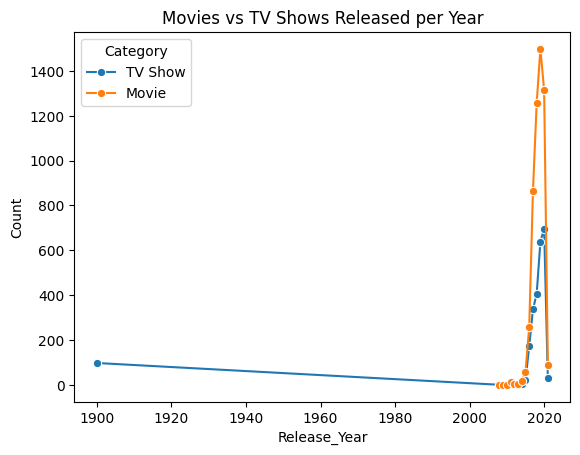

In [18]:
content_trend = df.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Release_Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Release_Year")
plt.ylabel("Count")
plt.show()

Spike has been seen in both movies and tv shows after 2010. Movies have been released more as compared to tv shows.

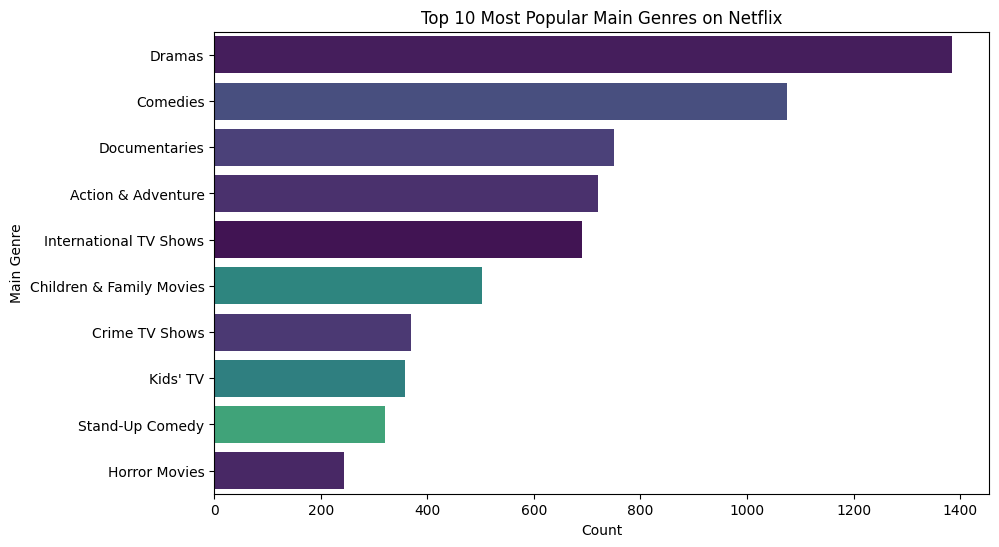

In [20]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Main_Genre', order=df['Main_Genre'].value_counts().index[:10], hue='Main_Genre', palette='viridis', legend=False)
plt.title('Top 10 Most Popular Main Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Main Genre')
plt.show()

Overall Analysis:

The visualization suggests that Netflix's content library in this dataset is heavily skewed towards Drama and Comedy, while still maintaining a healthy variety across other genres like Documentaries and Action & Adventure, as well as international content. This distribution likely reflects a strategy to appeal to a broad audience base with popular and widely consumed genres, while also offering content for more specific interests and markets.

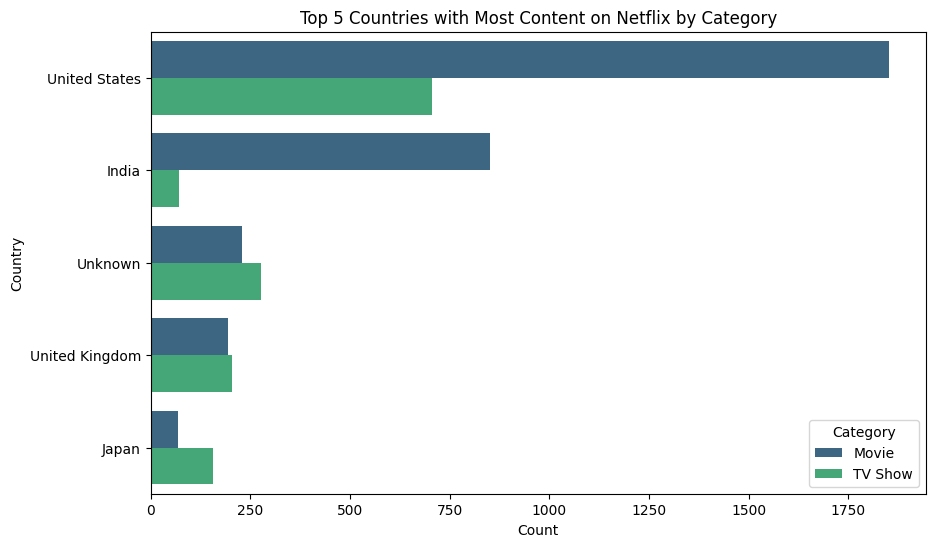

In [25]:
country_engagement = df.groupby(['Country', 'Category']).size().reset_index(name='Count')
# Get the top 5 countries based on total content count
top_countries = df['Country'].value_counts().head(5).index
# Filter the country_engagement DataFrame to include only the top countries
country_engagement_top5 = country_engagement[country_engagement['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.barplot(data=country_engagement_top5, x='Count', y='Country', hue='Category', palette='viridis', order=top_countries)
plt.title('Top 5 Countries with Most Content on Netflix by Category')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

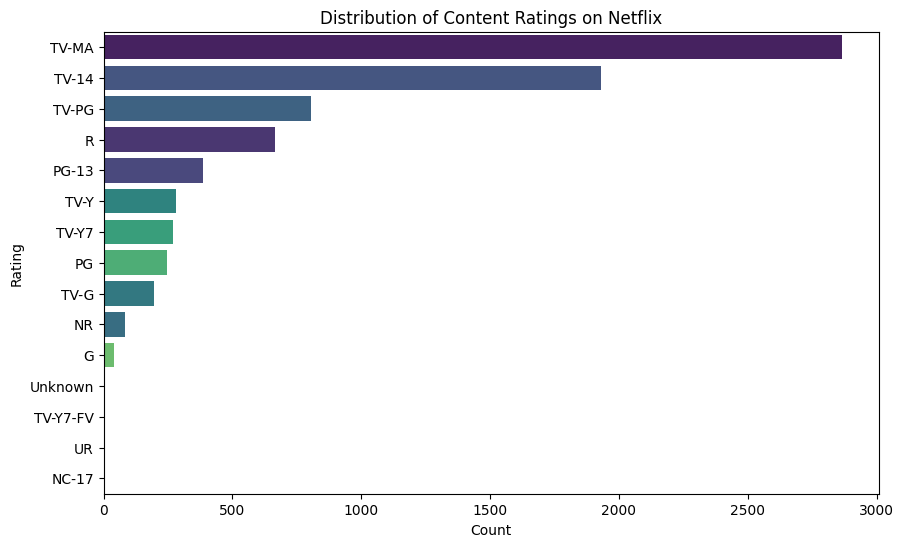

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, hue='Rating', palette='viridis', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

Suggestions:

Leverage Popular Genres: Continue to invest in Drama and Comedy content, as they appear to be strong drivers of content volume. Explore sub-genres within these categories that show emerging popularity.
Expand Niche Content: While popular genres are important, continue to diversify the content library by adding more titles in other genres (e.g., Sci-Fi, Horror, Romance) to cater to a wider range of viewer preferences and potentially attract new audiences.
Strategic Geographic Expansion: Analyze content performance in key markets like the United States and India to understand what resonates with local audiences. Consider increasing investment in content creation or acquisition in other regions that show high growth potential.
Refine Content Rating Strategy: Given the strong presence of mature content, analyze the performance of different rating categories to ensure the content mix aligns with target demographics and viewing habits. Consider if there are underserved age groups or rating categories.
Monitor TV Show Growth: Continue to monitor the trend of TV show consumption and consider further increasing investment in original TV series, as they can drive subscriber engagement and retention over longer periods.
Analyze "Unknown" Data: Investigate the titles with "Unknown" values for Country, Director, and Cast to see if this data can be enriched. Understanding the origin and creators of this content could provide further insights.

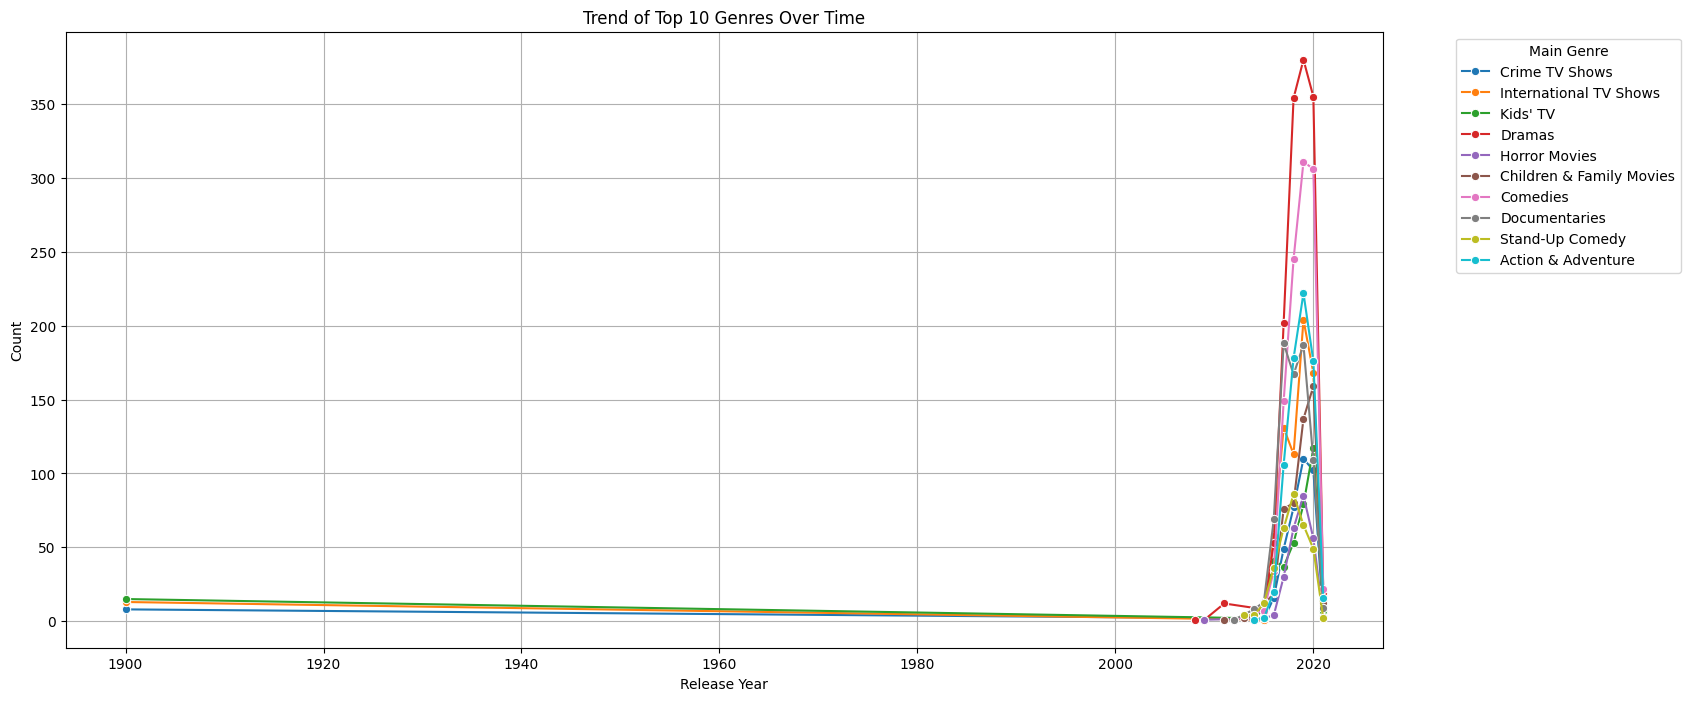

In [32]:
genre_trend = df.groupby(['Release_Year', 'Main_Genre']).size().reset_index(name='Count')

# Get the top genres to focus on for the plot
top_genres = df['Main_Genre'].value_counts().head(10).index

# Filter the genre_trend DataFrame to include only the top genres
genre_trend_top10 = genre_trend[genre_trend['Main_Genre'].isin(top_genres)]

plt.figure(figsize=(17, 8))
sns.lineplot(data=genre_trend_top10, x='Release_Year', y='Count', hue='Main_Genre', marker='o')
plt.title("Trend of Top 10 Genres Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title='Main Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Suggestions based on the Trends:

Capitalize on International Growth: Given the strong trend in International TV Shows, continue to invest in and promote content from diverse countries and languages. This is a key differentiator for Netflix.
Maintain Strength in Core Genres: Continue to produce and acquire high-quality Drama and Comedy content to satisfy the large existing audience for these genres.
Identify Emerging Trends within Genres: Look for specific sub-genres within Drama, Comedy, or other popular categories that are showing accelerated growth to stay ahead of audience preferences.
Strategic Investment in Other Genres: While focusing on the top genres, strategically invest in and market content in other categories like Documentaries, Action & Adventure, and niche genres to maintain a diverse library and attract different viewer segments.
Analyze Genre Performance by Region: Combine the genre trend analysis with the country analysis to understand which genres are performing well in specific geographic markets. This can inform localized content strategies.
Monitor Shifting Preferences: Continuously monitor genre trends and audience behavior to adapt the content strategy as preferences evolve.